## Test ceiling marker reading

In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
all_images = glob.glob('images/*.jpg')
print('Found '+str(len(all_images))+' images.')
print(all_images)

Found 15 images.
['images/marker_1_3_BedroomDoorPrinter.jpg', 'images/marker_1_BedroomDoorway.jpg', 'images/marker_1_BedroomDoorway_2.jpg', 'images/marker_2_3_CouchPrinter.jpg', 'images/marker_2_Couch.jpg', 'images/marker_3_4_PrinterWorkBench.jpg', 'images/marker_3_5_PrinterFrontDoor.jpg', 'images/marker_3_Printer.jpg', 'images/marker_4_WorkBench.jpg', 'images/marker_5_FrontDoor.jpg', 'images/marker_6_Kitchen.jpg', 'images/trial_img_0001.jpg', 'images/trial_img_0002.jpg', 'images/trial_img_0003.jpg', 'images/trial_img_0004.jpg']


[array([[[528., 243.],
        [527., 214.],
        [561., 212.],
        [562., 242.]]], dtype=float32), array([[[133.,  77.],
        [134., 105.],
        [103., 106.],
        [103.,  78.]]], dtype=float32)]

[[5]
 [4]]


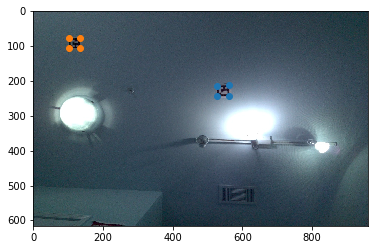

In [3]:
img_idx = 10
frame = cv2.imread(all_images[img_idx])
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
print(corners)
print('')
print(ids)
if len(corners) > 0:
    plt.imshow(frame)
    for corner in corners:
        plt.scatter(corner[0][:,0], corner[0][:,1])

In [4]:
## store marker ids and connectivity
marker_dict = {
    'bedroom': 0,
    'couch': 1,
    'printer': 2,
    'workbench': 3,
    'frontdoor': 4,
    'kitchen': 5
}

marker_conn = {
    0: [1,2],
    1: [0,2],
    2: [0,1,3,4],
    3: [2],
    4: [2,5],
    5: [4]
}

In [10]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
for img_file in all_images:
    frame = cv2.imread(img_file)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if len(corners) > 1:
        id_1 = ids[0][0]
        id_2 = ids[1][0]
        corners_1 = corners[0][0]
        corners_2 = corners[1][0]
        center_1 = np.mean(corners_1, axis=0)
        center_2 = np.mean(corners_2, axis=0)
        

[ 29.  344.5]
[708.   238.75]

[852.5 273. ]
[ 79.5  180.25]

[ 38.75 304.25]
[548.5 273. ]

[680.   238.75]
[131.   194.25]

[861.25 266.25]
[113.25 180.75]

[544.5  227.75]
[118.25  91.5 ]

